## Level 1
Exact expectation = 5.5 * 0.7kr = 3.85kr per BT

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
set_size = 100000

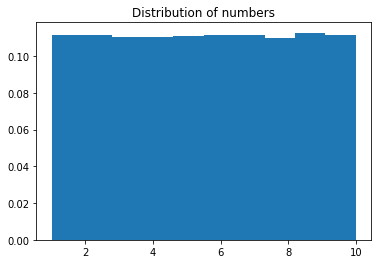

In [69]:
monte_carlo_rand_num = np.random.uniform(1, 10, set_size)
plt.hist(monte_carlo_rand_num, density=True)
plt.title("Distribution of numbers")
plt.show()

Mean value from 100 000 random numbers selling scraps: 3.8537823887378257
Standard deviation: 1.8200805760945025


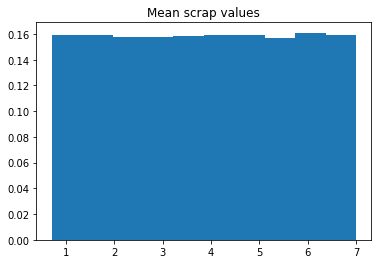

In [70]:
values = np.vectorize(lambda x: x*0.7)(monte_carlo_rand_num)
monte_carlo_scrap_sim = np.mean(values)
std = np.std(values)
print("Mean value from 100 000 random numbers selling scraps:", monte_carlo_scrap_sim)
print("Standard deviation:", std)
plt.hist(values, density=True)
plt.title("Mean scrap values")
plt.show()

Approximate $\approx$ 3.85

### Level 2


Mean value from 100 000 random numbers hanging with magic string: 103.86043232605743
Standard deviation: 1.4401938680642767


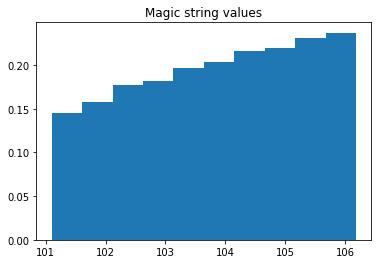

In [71]:
def m(x):
    return np.power(x, 1.5)


def BT_Fredriksen_price(x):
    return 100 + 1.1*np.sqrt(m(x))

values = np.vectorize(lambda x: BT_Fredriksen_price(x))(monte_carlo_rand_num)
hanging_magic_string_sum = np.mean(values)
std = np.std(values)
print("Mean value from 100 000 random numbers hanging with magic string:",hanging_magic_string_sum)
print("Standard deviation:", std)
plt.hist(values, density=True)
plt.title("Magic string values")
plt.show()

Approximate $\approx$ 103.5

### Level 3

In [72]:
with open("../Data/brands.txt") as brands_table:
    table = brands_table.read()

table = table.split()

i = 0
table_dict = {}
while i < len(table):
    table_dict[table[i]] = (eval(table[i+1]), eval(table[i+3]), eval(table[i+4]), eval(table[i+6]), eval(table[i+7]))
    i += 8

In [73]:
def prob(m, lamb, k):
    y = -(m/(1+(np.abs(lamb))))**(1+np.abs(k))
    return 1 - np.exp(y)

def break_string(brand, m):
    if brand == '0':
        return False
    x = np.random.rand()
    k = np.random.normal(table_dict[brand][0], table_dict[brand][1], 1)[0]
    lamb = np.random.normal(table_dict[brand][2], table_dict[brand][3], 1)[0]
    return x >= prob(m, lamb, k)

def string_price(brand):
    return table_dict[brand][4] if brand != '0' else 0

In [74]:
l = []
for key in table_dict.keys():
    values = np.vectorize(lambda x: (BT_Fredriksen_price(x)-table_dict[key][4]) if break_string(key, m(x))
                                    else x*0.7)(monte_carlo_rand_num)
    earnings = np.mean(values)
    std = np.std(values)
    print("Brand:", key,"expected earnings:", earnings)
    print("Standard error:", std/np.sqrt(len(values)), '\n')
    l.append(earnings)

Brand: 1 expected earnings: 38.20082076986199
Standard error: 0.13417029793914384 

Brand: 2 expected earnings: 41.73672786376644
Standard error: 0.1293454229654801 

Brand: 3 expected earnings: 23.184637317765457
Standard error: 0.1175283544620854 

Brand: 4 expected earnings: 21.246398454448233
Standard error: 0.10490737842159571 

Brand: 5 expected earnings: 52.26060039694302
Standard error: 0.12916712647985393 

Brand: 6 expected earnings: 35.98834116135919
Standard error: 0.13221249404576121 

Brand: 7 expected earnings: 37.94635983487836
Standard error: 0.1341381913930189 

Brand: 8 expected earnings: 32.818285291736025
Standard error: 0.13453318391562769 

Brand: 9 expected earnings: 45.32762315619311
Standard error: 0.12998276591634242 

Brand: 10 expected earnings: 30.063875484558995
Standard error: 0.13056944463439263 



Brand 5 has the highest earnings with $\approx$ 52

In [75]:
values = np.vectorize(lambda x: ((BT_Fredriksen_price(x))
                                    if break_string(str(np.random.randint(1,11)), m(x))
                                    else x*0.7)-table_dict[str(np.random.randint(1, 11))][4])(monte_carlo_rand_num)
print("Expected value:", np.mean(values))
print("Standard error:", np.std(values)/np.sqrt(len(values)))


Expected value: 29.28361300779515
Standard error: 0.14846206612549517


The expected value of a uniformly random choice brand is $\approx$ 29, so Hubert shouldn't sell to the guy his guy knows!!


In [76]:
def hubert_take_steps(n, epsilon, alpha=0.1):
    avg_earnings = {}
    plot_earnings = {}
    for key in table_dict.keys():
        avg_earnings[key] = 0
        plot_earnings[key] = [0]

    #Adding brand 0, which is selling to a guy who knows our guy...
    avg_earnings['0'] = 0
    plot_earnings['0'] = []

    reward = 0
    bts = np.random.uniform(1, 10, n)
    for i, bt in enumerate(bts):
        p = np.random.rand()
        if i == 0 or p > 1-epsilon:
            max_key = str(np.random.randint(11))
        else:
            max_key = max(avg_earnings, key=avg_earnings.get)
        c_reward = (BT_Fredriksen_price(bt) if break_string(max_key, m(bt)) else bt*0.7)- (string_price(max_key))
        reward += c_reward
        avg_earnings[max_key] += alpha*(c_reward-avg_earnings[max_key])
        plot_earnings[max_key].append(c_reward)
    return plot_earnings, avg_earnings, reward

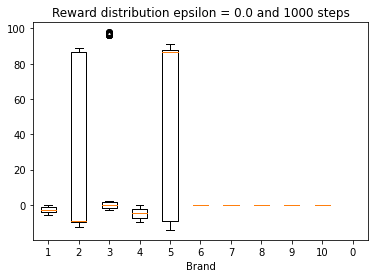

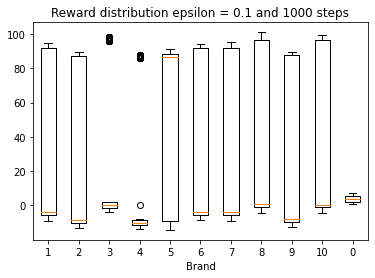

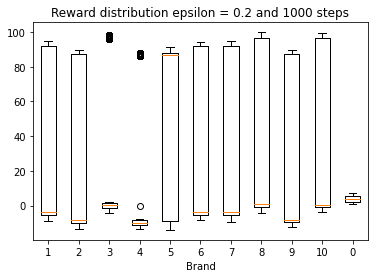

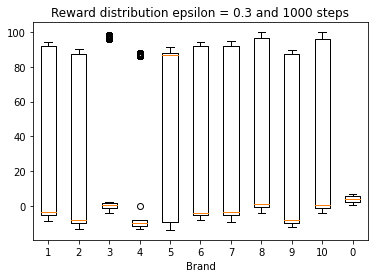

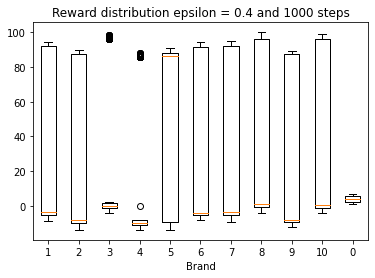

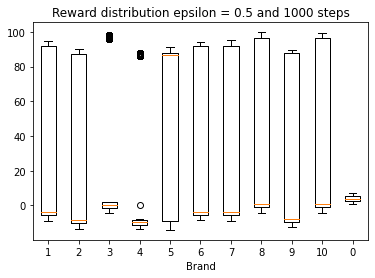

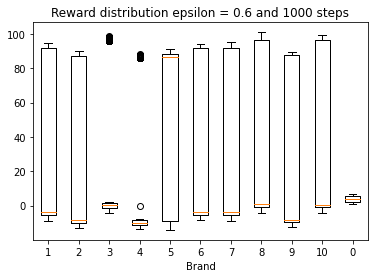

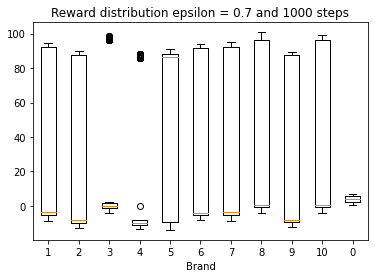

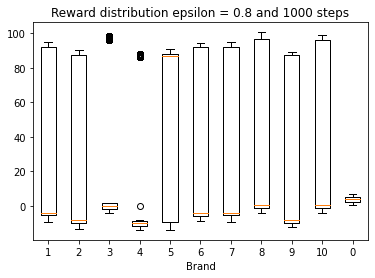

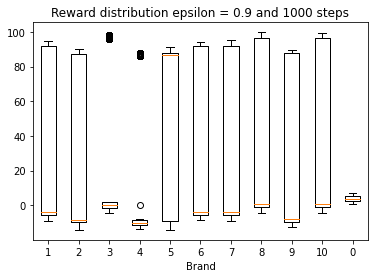

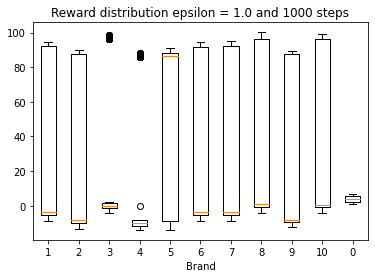

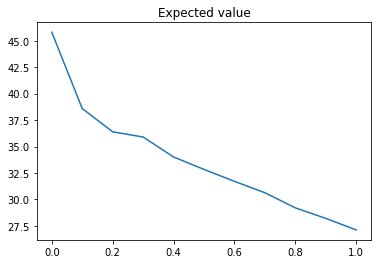

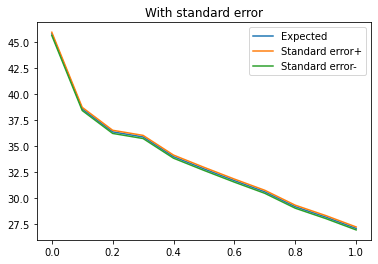

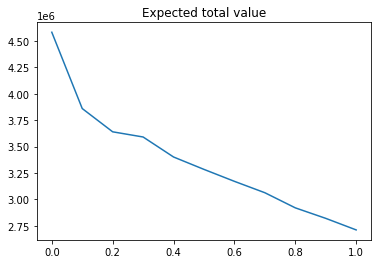

In [79]:
e_of_x = []
t_of_x = []
std_of_xp = []
std_of_xm = []
epsilon_values = []
for i in range(11):
    plot_earnings, avg_earnings, reward = hubert_take_steps(100000, i/10)
    plt.boxplot([plot_earnings[k] for k in plot_earnings.keys()], labels=plot_earnings.keys())
    plt.title("Reward distribution epsilon = " + str(i/10) + " and " + str(1000) + " steps")
    plt.xlabel("Brand")
    plt.show()
    l = []
    for k in plot_earnings.keys():
        l.extend(plot_earnings[k])

    e = np.mean(l)
    t = np.sum(l)
    std = np.std(l)/np.sqrt(len(l))
    e_of_x.append(e)
    t_of_x.append(t)
    std_of_xp.append(e+std)
    std_of_xm.append(e-std)
    epsilon_values.append(i/10)
plt.plot(epsilon_values, e_of_x)
plt.title("Expected value")
plt.show()

plt.plot(epsilon_values, e_of_x, label="Expected")
plt.plot(epsilon_values, std_of_xp, label="Standard error+")
plt.plot(epsilon_values, std_of_xm, label="Standard error-")
plt.legend(loc="upper right")
plt.title("With standard error")
plt.show()

plt.plot(epsilon_values, t_of_x)
plt.title("Expected total value")
plt.show()